In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('D:/Research Working Folder/Paper_1-Mobile Sensing Virtual Environment/static_50cm_DEMO.csv')

In [3]:
data

,X,Y,Z,0.0,1.0,2.0,3.0,4.0,5.0,6.0,...,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0
0,0.000000,-0.258711,0.5,300.237854,300.237854,300.237854,300.237854,300.237854,300.237854,300.237854,...,300.237854,300.237854,300.237854,300.237854,300.237854,300.237854,300.237854,300.237854,300.237854,300.237854
1,0.000000,0.309477,0.5,300.688934,300.688934,300.688934,300.688934,300.688934,300.688934,300.688934,...,300.688934,300.688934,300.688934,300.688934,300.688934,300.688934,300.688934,300.688934,300.688934,300.688934
2,0.100658,0.310122,0.5,300.597900,300.597900,300.597900,300.597900,300.597900,300.597900,300.597900,...,300.597900,300.597900,300.597900,300.597900,300.597900,300.597900,300.597900,300.597900,300.597900,300.597900
3,0.097055,-0.267367,0.5,300.145996,300.145996,300.145996,300.145996,300.145996,300.145996,300.145996,...,300.145996,300.145996,300.145996,300.145996,300.145996,300.145996,300.145996,300.145996,300.145996,300.145996
4,0.000000,0.938231,0.5,301.322418,301.322418,301.322418,301.322418,301.322418,301.322418,301.322418,...,301.322418,301.322418,301.322418,301.322418,301.322418,301.322418,301.322418,301.322418,301.322418,301.322418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13893,22.450001,58.326363,0.5,301.077271,301.077271,301.077271,301.077271,301.077271,301.077271,301.077271,...,301.077271,301.077271,301.077271,301.077271,301.077271,301.077271,301.077271,301.077271,301.077271,301.077271
13894,22.450001,58.551903,0.5,301.010925,301.010925,301.010925,301.010925,301.010925,301.010925,301.010925,...,301.010925,301.010925,301.010925,301.010925,301.010925,301.010925,301.010925,301.010925,301.010925,301.010925
13895,22.443819,57.949913,0.5,301.198334,301.198334,301.198334,301.198334,301.198334,301.198334,301.198334,...,301.198334,301.198334,301.198334,301.198334,301.198334,301.198334,301.198334,301.198334,301.198334,301.198334
13896,22.450001,57.949120,0.5,301.193665,301.193665,301.193665,301.193665,301.193665,301.193665,301.193665,...,301.193665,301.193665,301.193665,301.193665,301.193665,301.193665,301.193665,301.193665,301.193665,301.193665


In [111]:
from scipy.interpolate import LinearNDInterpolator
from scipy.interpolate import NearestNDInterpolator

In [189]:
x=data.iloc[:,1]
y=data.iloc[:,0]
z=data.iloc[:,3]
X = np.linspace(min(x), max(x), 100)
Y = np.linspace(min(y), max(y), 100)
X, Y = np.meshgrid(X, Y)

In [223]:
interp = LinearNDInterpolator(list(zip(x, y)), z)
Z = interp(X, Y)

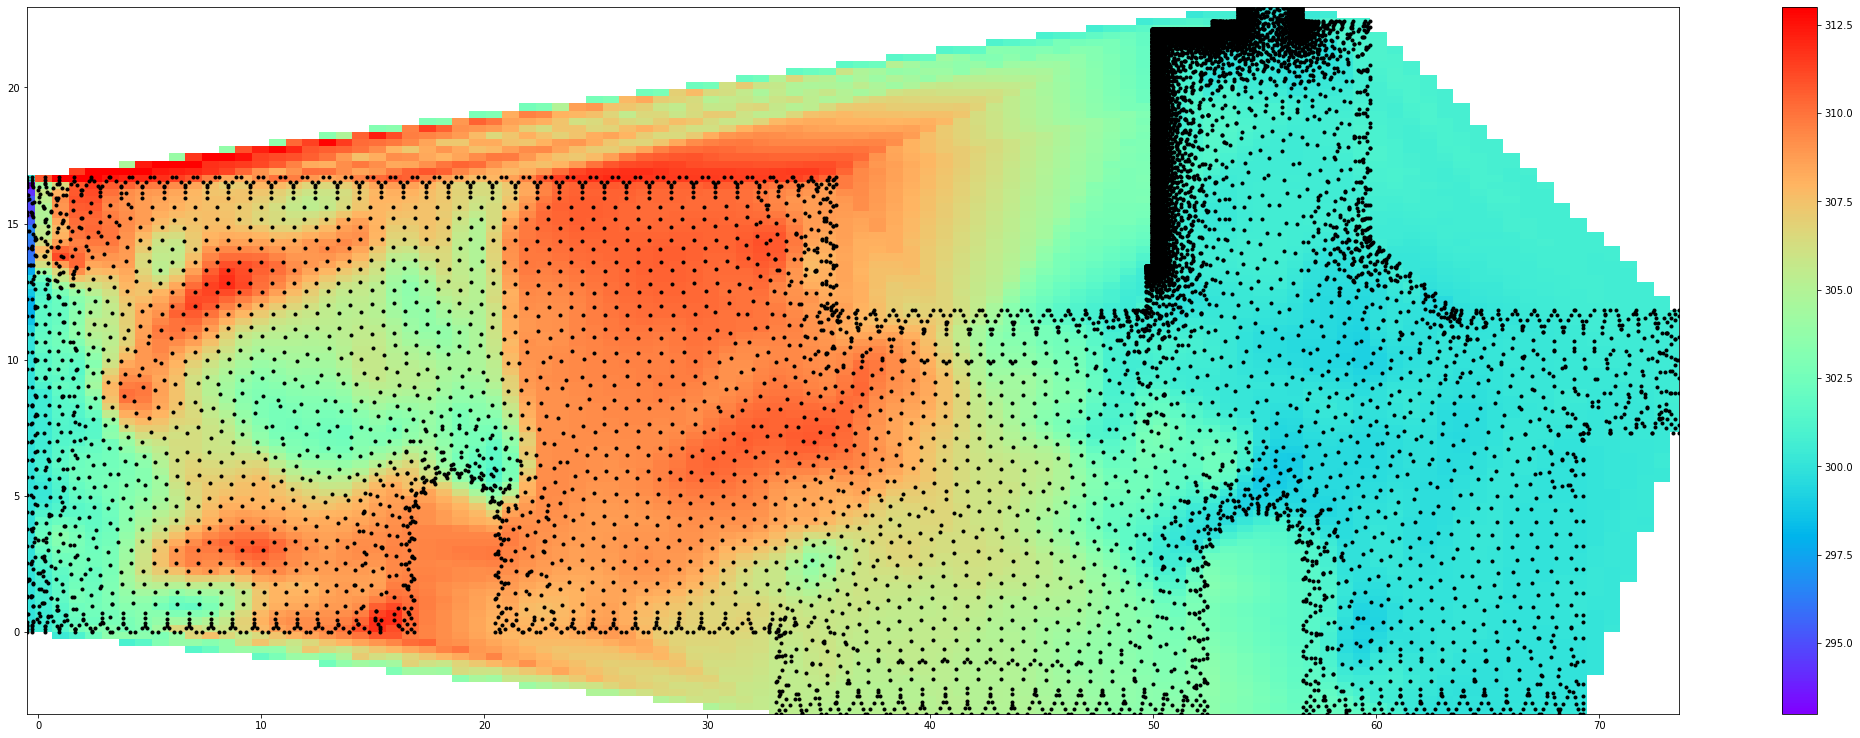

In [216]:
plt.figure(figsize=(37,13))

plt.pcolormesh(X, Y, Z, shading='auto', cmap='rainbow')
plt.plot(x, y, ".k", label="input point")
plt.xlim(-0.5,73.55)
plt.ylim(-3,22.95)
plt.colorbar()
plt.clim(293,313)


In [224]:
delta=1.5

for i in range(100):
    for j in range(100):
        bb=np.array([X[0,i], Y[j,0]])
        judge_array=[0,0,0,0]
        window_data=data.loc[(data['Y']>(bb[0]-delta)) & (data['Y']<(bb[0]+delta)) & 
        (data['X']>(bb[1]-delta)) & (data['X']<(bb[1]+delta)), ['X', 'Y']]
        judge_array[0]=window_data.loc[(window_data['X']<bb[1]) & (window_data['Y']<bb[0])].empty
        judge_array[1]=window_data.loc[(window_data['X']<bb[1]) & (window_data['Y']>bb[0])].empty
        judge_array[2]=window_data.loc[(window_data['X']>bb[1]) & (window_data['Y']<bb[0])].empty
        judge_array[3]=window_data.loc[(window_data['X']>bb[1]) & (window_data['Y']>bb[0])].empty
        if True in judge_array:
            Z[j,i]=np.nan 

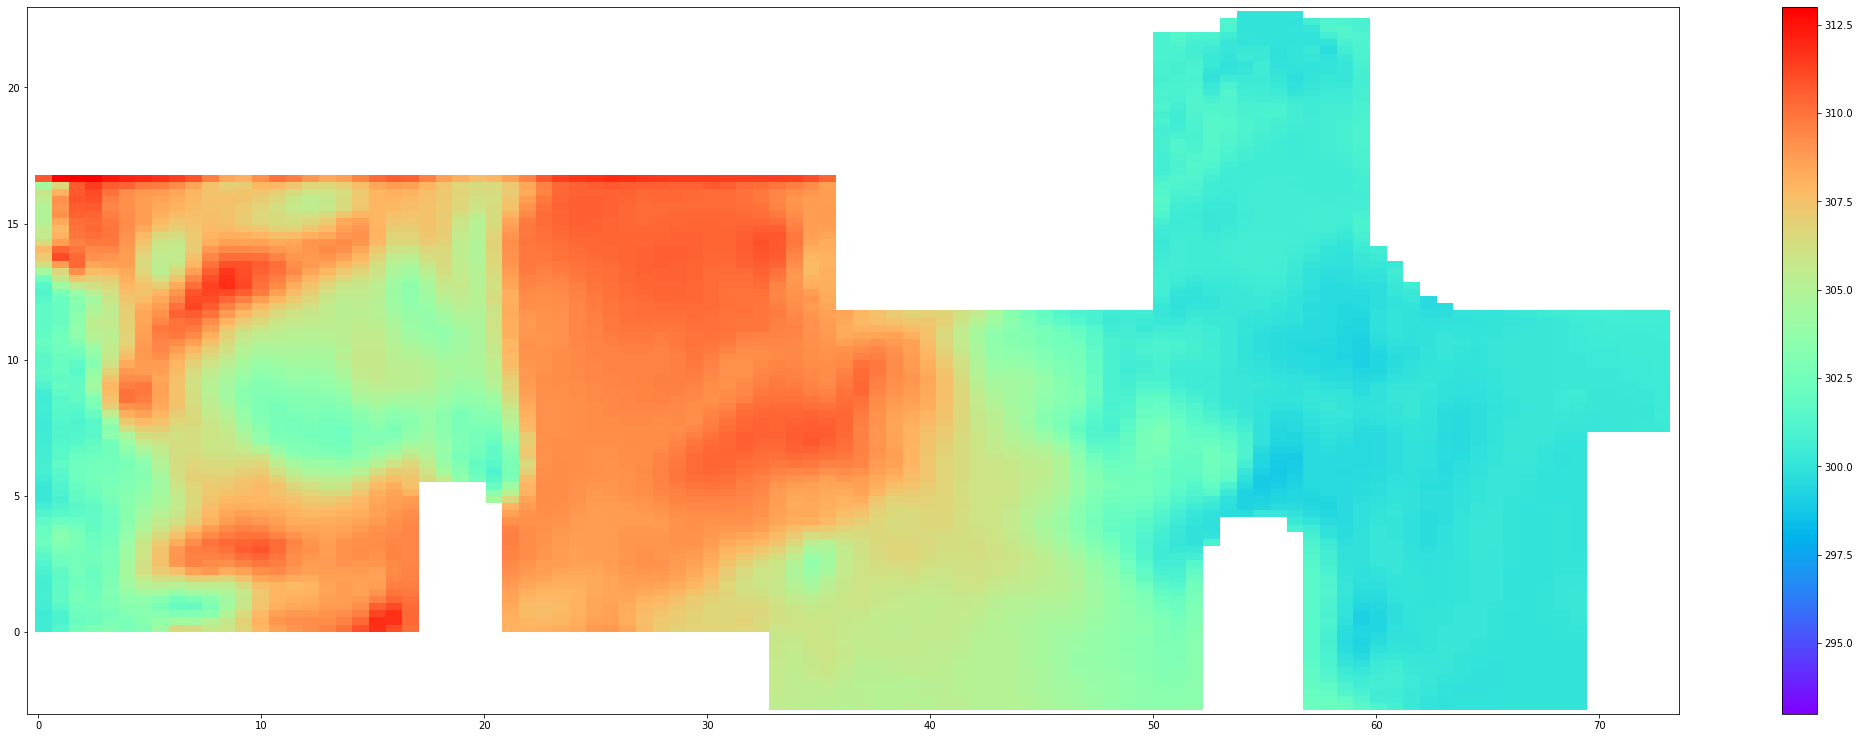

In [226]:
plt.figure(figsize=(37,13))

plt.pcolormesh(X, Y, Z, shading='auto', cmap='rainbow')
#plt.plot(x, y, ".k", label="input point")
plt.xlim(-0.5,73.55)
plt.ylim(-3,22.95)
plt.colorbar()
plt.clim(293,313)


In [123]:
k=interp([19, 13])

In [124]:
k

array([305.310242])